<a href="https://colab.research.google.com/github/73rnandaL1ma/Aprendendo_MachineLearning/blob/main/Aprendendo_MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


tabela = pd.read_csv ("/content/drive/MyDrive/barcos_ref.csv")
display (tabela)

,Preco,TipoBarco,TipoVenda,Ano,Comprimento,Largura,Material
0,3490,1,1,2020,4.00,1.50,1
1,3399,2,1,2019,3.55,1.46,2
2,3600,3,2,1999,6.20,2.38,2
3,3500,2,2,1987,4.35,1.75,3
4,3500,4,2,2004,4.70,2.00,3
...,...,...,...,...,...,...,...
7644,5000,7,2,1974,7.20,2.70,3
7645,4999,4,2,1980,6.00,2.10,3
7646,4950,2,2,1984,6.00,1.62,5
7647,4499,4,1,2020,4.40,1.80,3


In [ ]:
print (tabela.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7649 entries, 0 to 7648
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Preco        7649 non-null   int64  
 1   TipoBarco    7649 non-null   int64  
 2   TipoVenda    7649 non-null   int64  
 3   Ano          7649 non-null   int64  
 4   Comprimento  7649 non-null   float64
 5   Largura      7649 non-null   float64
 6   Material     7649 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 418.4 KB
None


In [ ]:
#Passo - Análise Exploratória
correlacao = tabela.corr() [["Preco"]]
display (correlacao)


,Preco
Preco,1.000000
TipoBarco,0.293137
TipoVenda,0.041266
Ano,0.113385
Comprimento,0.578353
Largura,0.557621
Material,-0.036476


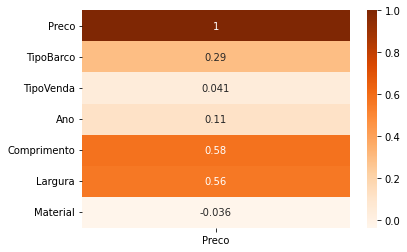

In [ ]:
#Criando gráfico
import seaborn as sns
import matplotlib.pyplot as plt


sns.heatmap(correlacao, cmap="Oranges", annot=True)
plt.show()

#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [ ]:
#Modelagem + Algoritimo 
#Dividr a base em x e y 

y=tabela["Preco"]

x = tabela.drop("Preco", axis= 1)

#train test spit 

from sklearn.model_selection import train_test_split

x_treino , x_teste , y_treino , y_teste = train_test_split(x,y, test_size= 0.3, random_state=1)

#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [ ]:
#RegressaoLinear e ArvoreDeDecisao
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

#Criar a Ia 

modelo_regressaolinear = LinearRegression()
moedelo_arvoredecisao = RandomForestRegressor()


modelo_regressaolinear.fit(x_treino, y_treino)
modelo_arvoredecisao.fit(x_treino, y_treino)



RandomForestRegressor()

#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [ ]:
#Verificando qual o melhor modelo de IA
from sklearn.metrics import r2_score

previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)

print (r2_score (y_teste, previsao_regressaolinear))
print (r2_score(y_teste, previsao_arvoredecisao))

0.4490324760735812
0.8600231108728583


#### Visualização Gráfica das Previsões

<function matplotlib.pyplot.show(close=None, block=None)>

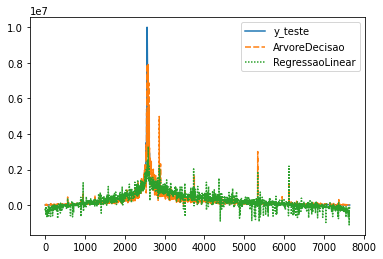

In [ ]:
#Visualizar as previsões

tabela_auxiliar = pd.DataFrame ()
tabela_auxiliar ["y_teste"] = y_teste
tabela_auxiliar["ArvoreDecisao"] = previsao_arvoredecisao
tabela_auxiliar ["RegressaoLinear"] = previsao_regressaolinear

sns.lineplot(data=tabela_auxiliar)
plt.show

In [ ]:
#Novas previsões 

tabela_nova = pd.read_csv("/content/drive/MyDrive/novos_barcos.csv")

display(tabela_nova)

previsao = modelo_arvoredecisao.predict(tabela_nova)

print (previsao)

,TipoBarco,TipoVenda,Ano,Comprimento,Largura,Material
0,2,3,2023,3.0,1.5,1
1,2,1,2023,3.8,1.9,2
2,3,2,1999,6.2,3.0,2


[ 6171.14416667  9140.66666667 20602.4       ]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
